# 🎬 Filmception AI Project

## 👥 Team Information
| Name | Roll Number | Section |
|------|------------|---------|
| Syed Arham Ahmed | 22i-1552 | CY-B |
| Muhammad Musaab | 22i-1560 | CY-B |

## 📋 Project Overview
A deep learning system that analyzes movie plot summaries to:
- Predict movie genres
- Translate summaries to multiple languages
- Convert text to speech
- Provide an interactive GUI interface

## 🛠️ Technical Stack
- **Language:** Python 3.10.11 & 3.12.7
- **Deep Learning:** PyTorch, Transformers
- **Data Processing:** pandas, scikit-learn
- **GUI:** tkinter
- **Translation:** M2M100
- **Audio:** gTTS

## 📚 Project Structure
1. **Data Preprocessing**
   - Movie metadata cleaning
   - Character data processing
   - Plot summary normalization

2. **Model Development**
   - BERT-based genre classifier
   - Multi-label classification
   - Training and validation (80/20 split)

3. **Language Processing**
   - Multi-language translation
   - Text-to-speech conversion

4. **User Interface**
   - Modern dark-themed GUI
   - Genre prediction
   - Audio generation

---



# Part#1 Pre-processing

# 🎬 Movie Metadata Cleaning Script — Code Explanation

This script processes and cleans a TSV file (`movie.metadata.tsv`) containing movie-related metadata like titles, genres, languages, and more.

---

## 📚 Libraries Used

- `pandas`: For reading and manipulating tabular data.
- `re`: For performing regular expression operations on text.

---

## 🔧 Functions

### `clean_text_data(text)`
Cleans and normalizes textual data by:
- Converting text to lowercase.
- Removing special characters (preserves accented letters).
- Removing basic English stopwords.
- Trimming redundant spaces.

### `extract_values_from_json(json_text)`
Extracts values from a JSON-like string, typically found in `genres`, `languages`, and `countries` columns:
- Matches values from key-value pairs like `"/m/01jfsb": "Thriller"`.
- Cleans the extracted values using `clean_text_data`.

---

## 🧼 Main Cleaning Logic

### Step 1: Load Dataset
- Uses `pd.read_csv()` to load `movie.metadata.tsv` with appropriate column names.

### Step 2: Create Cleaned DataFrame
- Initializes a new DataFrame `df_clean`.
- Copies essential columns like `id` and `movie_id`.
- Applies `clean_text_data()` to clean `title`.
- Parses `release_date` as datetime, `box_office` and `runtime` as numeric.

### Step 3: Extract and Clean Lists
- Applies `extract_values_from_json()` to clean `languages`, `countries`, and `genres`.
- Converts the lists to comma-separated strings for easier CSV export.

### Step 4: Save Cleaned Data
- Writes the cleaned DataFrame to `movie_metadata_cleaned.csv`.

---

## 📊 Genre Analysis

- Aggregates all genres across movies.
- Strips whitespace and filters out empty values.
- Displays:
  - Total number of movies.
  - Number of unique genres.
  - Top 10 most frequent genres with their counts.

---

## ✅ Output

- Sample of cleaned data is printed.
- Cleaned dataset is saved to a CSV file.
- Basic genre statistics are displayed.

---


In [ ]:
import pandas as pd
import re

def clean_text_data(text):
    """
    Clean text by:
    - Converting to lowercase
    - Removing special characters but preserving letters, including accented ones
    - Removing redundant spaces
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters but keep alphabets (including accented ones)
    text = re.sub(r'[^a-z\u00C0-\u00FF\s]', ' ', text)
    
    # Basic stopwords list (common English stopwords)
    basic_stopwords = {'a', 'an', 'the', 'and', 'or', 'but', 'if', 'because', 'as', 'what',
                      'which', 'this', 'that', 'these', 'those', 'then', 'just', 'so', 'than',
                      'such', 'both', 'through', 'about', 'for', 'is', 'of', 'while', 'during',
                      'to', 'from', 'in', 'on', 'at', 'by', 'with'}
    
    # Split by whitespace to get words
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in basic_stopwords]
    
    # Join the words back into a string and remove redundant spaces
    text = ' '.join(words)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def extract_values_from_json(json_text):
    """Extract only the values from JSON-like structures"""
    if not isinstance(json_text, str):
        return []
    
    # Extract values from pattern like "/m/01jfsb": "Thriller"
    matches = re.findall(r'": "([^"]+)"', json_text)
    # Clean extracted values
    return [clean_text_data(m) for m in matches]

def main():
    # Define the column names based on the provided sample
    column_names = [
        'id', 'movie_id', 'title', 'release_date', 'box_office', 
        'runtime', 'languages', 'countries', 'genres'
    ]
    
    # Load the TSV file
    try:
        df = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_names)
        print(f"Successfully loaded the dataset with {len(df)} rows")
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        return
    
    # Create a new dataframe for cleaned data
    df_clean = pd.DataFrame()
    
    # Keep ID fields as is
    df_clean['id'] = df['id']
    df_clean['movie_id'] = df['movie_id']
    
    # Clean title field
    df_clean['title'] = df['title'].apply(clean_text_data)
    
    # Add release date, box office, and runtime
    df_clean['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df_clean['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')
    df_clean['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
    
    # Extract and clean languages, countries, and genres
    df_clean['languages'] = df['languages'].apply(extract_values_from_json)
    df_clean['countries'] = df['countries'].apply(extract_values_from_json)
    df_clean['genres'] = df['genres'].apply(extract_values_from_json)
    
    # Handle data types more carefully
    numeric_cols = ['id', 'box_office', 'runtime']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Convert lists to strings for better CSV storage
    for col in ['languages', 'countries', 'genres']:
        df_clean[col] = df_clean[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    
    # Print a sample of the cleaned data
    print("\nSample of cleaned data:")
    print(df_clean[['id', 'title', 'movie_id', 'genres']].head())
    
    # Save the cleaned data
    df_clean.to_csv('movie_metadata_cleaned.csv', index=False)
    print("\nCleaned data saved to 'movie_metadata_cleaned.csv'")
    
    # Print statistics
    print(f"\nTotal movies: {len(df_clean)}")
    
    # Analyze genres
    all_genres = []
    for genre_str in df_clean['genres'].dropna():
        all_genres.extend([g.strip() for g in genre_str.split(',') if g.strip()])
    
    unique_genres = set(all_genres)
    print(f"Total unique genres after cleaning: {len(unique_genres)}")
    print("Top 10 genres:", sorted([(genre, all_genres.count(genre)) for genre in unique_genres], 
                                   key=lambda x: x[1], reverse=True)[:10])

if __name__ == "__main__":
    main()

# 🎭 Character Metadata Cleaning Script — Code Explanation

This script cleans and processes the `character.metadata.tsv` file from the MovieSummaries dataset, which contains metadata about actors, their characters, and movie information.

---

## 📚 Libraries Used

- `pandas`: For loading, manipulating, and analyzing tabular data.
- `re`: For regular expressions, especially text cleaning.
- `datetime`: For handling and converting date values.

---

## 🔧 Functions

### `clean_text_data(text)`
Cleans and normalizes strings by:
- Lowercasing all text.
- Removing special characters while preserving accented letters.
- Removing stopwords (basic English words like "a", "the", etc.).
- Removing extra whitespace.

### `calculate_age(birth_date, movie_date)`
(Initially defined but later replaced by vectorized operations)
- Calculates the age of an actor at the time of movie release by comparing dates.
- Adjusts for whether the birthday occurred before the movie release in that year.

---

## 🧼 Main Script Workflow

### Step 1: Load Data
- Defines expected column names for the TSV.
- Loads `character.metadata.tsv` with `pd.read_csv()` using tab delimiter.

### Step 2: Initialize Cleaned DataFrame
- Creates a new DataFrame `df_clean` to store cleaned fields.
- Preserves important ID fields like `movie_id` and `freebase_movie_id`.

### Step 3: Clean Text Fields
- Applies `clean_text_data()` to `character_name` and `actor_name`.

### Step 4: Parse and Normalize Dates
- Converts `movie_release_date` and `actor_dob` to datetime format using `errors='coerce'`.

### Step 5: Handle Gender, Height, Ethnicity
- Keeps `actor_gender` as-is (typically 'M' or 'F').
- Converts `actor_height` to numeric, coercing invalid values to NaN.
- Cleans `actor_ethnicity` by removing ID patterns like `/m/02xyz`.

### Step 6: Calculate Actor Age at Release
- Uses vectorized operations to subtract `birth year` from `movie year`.
- Adjusts for whether the birthday had occurred before the movie release.
- Falls back to the original `actor_age_at_release` if necessary.

### Step 7: Final Cleaning
- Drops the temporary calculated age column.
- Ensures string-only representation of remaining Freebase IDs.
- Prints a sample of cleaned fields.

---

## 💾 Output

- Saves the cleaned DataFrame as `character_metadata_cleaned.csv`.

---

## 📊 Summary Statistics

- **Total characters**: Displays total rows processed.
- **Gender distribution**: Shows counts and percentages of each gender.
- **Actor age stats**: Shows mean, min, and max ages of actors at time of release.

---





In [ ]:
import pandas as pd
import re
from datetime import datetime

def clean_text_data(text):
    """
    Clean text by:
    - Converting to lowercase
    - Removing special characters but preserving letters, including accented ones
    - Removing redundant spaces
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters but keep alphabets (including accented ones)
    text = re.sub(r'[^a-z\u00C0-\u00FF\s]', ' ', text)
    
    # Basic stopwords list (common English stopwords)
    basic_stopwords = {'a', 'an', 'the', 'and', 'or', 'but', 'if', 'because', 'as', 'what',
                      'which', 'this', 'that', 'these', 'those', 'then', 'just', 'so', 'than',
                      'such', 'both', 'through', 'about', 'for', 'is', 'of', 'while', 'during',
                      'to', 'from', 'in', 'on', 'at', 'by', 'with'}
    
    # Split by whitespace to get words
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in basic_stopwords]
    
    # Join the words back into a string and remove redundant spaces
    text = ' '.join(words)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def calculate_age(birth_date, movie_date):
    """Calculate age based on birth date and movie release date"""
    try:
        if pd.isnull(birth_date) or pd.isnull(movie_date):
            return None
        
        birth = pd.to_datetime(birth_date)
        movie = pd.to_datetime(movie_date)
        
        # Calculate age
        age = movie.year - birth.year
        
        # Adjust age if birthday hasn't occurred yet in the movie release year
        if (movie.month, movie.day) < (birth.month, birth.day):
            age -= 1
            
        return age
    except:
        return None

def main():
    # Define the column names based on the provided sample
    column_names = [
        'movie_id', 'freebase_movie_id', 'movie_release_date', 
        'character_name', 'actor_dob', 'actor_gender', 
        'actor_height', 'actor_ethnicity', 'actor_name', 
        'actor_age_at_release', 'freebase_character_id', 
        'freebase_actor_id', 'freebase_person_id'
    ]
    
    # Load the TSV file
    try:
        df = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None, names=column_names)
        print(f"Successfully loaded the character dataset with {len(df)} rows")
    except Exception as e:
        print(f"Error loading the character dataset: {e}")
        return
    
    # Create a new dataframe for cleaned data
    df_clean = pd.DataFrame()
    
    # Keep ID fields as is
    df_clean['movie_id'] = df['movie_id']
    df_clean['freebase_movie_id'] = df['freebase_movie_id']
    
    # Clean text fields
    df_clean['character_name'] = df['character_name'].apply(clean_text_data)
    df_clean['actor_name'] = df['actor_name'].apply(clean_text_data)
    
    # Handle dates
    df_clean['movie_release_date'] = pd.to_datetime(df['movie_release_date'], errors='coerce')
    df_clean['actor_dob'] = pd.to_datetime(df['actor_dob'], errors='coerce')
    
    # Clean and convert other fields
    df_clean['actor_gender'] = df['actor_gender']  # Keep as is - typically just M or F
    df_clean['actor_height'] = pd.to_numeric(df['actor_height'], errors='coerce')
    
    # Remove ID patterns from actor_ethnicity
    df_clean['actor_ethnicity'] = df['actor_ethnicity'].apply(
        lambda x: "" if not isinstance(x, str) else re.sub(r'/\w+/\w+', '', x)
    )
    
    # Verify actor age - recalculate if possible, otherwise keep original
    # df_clean['actor_age_calculated'] = df.apply(
    #     lambda row: calculate_age(row['actor_dob'], row['movie_release_date']), axis=1
    # )
    
    birth = pd.to_datetime(df['actor_dob'], errors='coerce')
    movie = pd.to_datetime(df['movie_release_date'], errors='coerce')

    age = movie.dt.year - birth.dt.year
    age -= ((movie.dt.month < birth.dt.month) | 
            ((movie.dt.month == birth.dt.month) & (movie.dt.day < birth.dt.day))).astype(int)

    df_clean['actor_age_calculated'] = age


    # If calculated age is available, use it; otherwise, use the provided age
    # df_clean['actor_age'] = df_clean.apply(
    #     lambda row: row['actor_age_calculated'] 
    #     if not pd.isnull(row['actor_age_calculated']) 
    #     else pd.to_numeric(df['actor_age_at_release'], errors='coerce'), 
    #     axis=1
    # )
    
    df_clean['actor_age'] = df_clean['actor_age_calculated'].fillna(
        pd.to_numeric(df['actor_age_at_release'], errors='coerce')
    )


    # Drop the temporary calculated age column
    df_clean.drop('actor_age_calculated', axis=1, inplace=True)
    
    # Keep remaining ID fields for reference
    df_clean['freebase_character_id'] = df['freebase_character_id'].apply(
        lambda x: "" if not isinstance(x, str) else x
    )
    df_clean['freebase_actor_id'] = df['freebase_actor_id'].apply(
        lambda x: "" if not isinstance(x, str) else x
    )
    df_clean['freebase_person_id'] = df['freebase_person_id'].apply(
        lambda x: "" if not isinstance(x, str) else x
    )
    
    # Print a sample of the cleaned data
    print("\nSample of cleaned data:")
    print(df_clean[['movie_id', 'character_name', 'actor_name', 'actor_age']].head())
    
    # Save the cleaned data
    df_clean.to_csv('character_metadata_cleaned.csv', index=False)
    print("\nCleaned data saved to 'character_metadata_cleaned.csv'")
    
    # Print statistics
    print(f"\nTotal characters: {len(df_clean)}")
    
    # Gender distribution
    gender_counts = df_clean['actor_gender'].value_counts()
    print("\nGender distribution:")
    for gender, count in gender_counts.items():
        print(f"{gender}: {count} ({count/len(df_clean)*100:.1f}%)")
    
    # Age statistics
    age_stats = df_clean['actor_age'].describe()
    print("\nActor age statistics:")
    print(f"Average age: {age_stats['mean']:.1f}")
    print(f"Youngest: {age_stats['min']}")
    print(f"Oldest: {age_stats['max']}")

if __name__ == "__main__":
    main()

# 📄 Merge Movie Metadata with Plot Summaries

## 🎯 Purpose
This script merges two datasets:
- A CSV file (`movie_metadata_cleaned.csv`) that contains movie IDs and their genres.
- A text file (`cleaned_plot_summaries.txt`) that contains movie IDs and their cleaned plot summaries.

The output is a combined CSV file (`movie_metadata_forTraining.csv`) with `id`, `summary`, and `genres` columns, suitable for training machine learning models.

---

## 📂 Input Files

### `movie_metadata_cleaned.csv`
- Format: CSV
- Columns:
  - `id`: Movie ID (string/integer)
  - `genres`: Pipe-separated genre labels (e.g., `"Action|Adventure|Sci-Fi"`)

### `cleaned_plot_summaries.txt`
- Format: Tab-separated text file
- Each line: `<movie_id>\t<summary>`

---

## 📤 Output File

### `movie_metadata_forTraining.csv`
- Format: CSV
- Columns:
  - `id`: Movie ID
  - `summary`: Cleaned movie summary
  - `genres`: Genre labels (same as input)

---

## 🧠 How It Works

1. **Load summaries into a dictionary**
   - Each line in `cleaned_plot_summaries.txt` is read and split by a tab (`\t`).
   - The movie ID is used as the key, and the summary as the value in a Python dictionary.

2. **Read metadata and combine**
   - For each row in `movie_metadata_cleaned.csv`, the movie ID is used to retrieve its corresponding summary from the dictionary.
   - If a summary is not found, an empty string is used instead.

3. **Write combined data**
   - A new CSV file is created with columns: `id`, `summary`, and `genres`.

---

In [ ]:
import csv

# File paths
csv_file = 'movie_metadata_cleaned.csv'        # contains movie_id and genres
summary_file = 'cleaned_plot_summaries.txt' # contains movie_id and summary
output_file = 'movie_metadata_forTraining.csv'

# Step 1: Read summaries into a dictionary
summaries = {}
with open(summary_file, 'r', encoding='utf-8') as sfile:
    for line in sfile:
        parts = line.strip().split('\t')  # change to '|||' if that's your delimiter
        if len(parts) == 2:
            id, summary = parts
            summaries[id.strip()] = summary.strip()

# Step 2: Read movie_id and genres from CSV and combine with summaries
with open(csv_file, 'r', encoding='utf-8') as infile, \
     open(output_file, 'w', encoding='utf-8', newline='') as outfile:

    reader = csv.DictReader(infile)
    fieldnames = ['id', 'summary', 'genres']
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()

    for row in reader:
        id = row['id'].strip()
        genres = row['genres'].strip()
        summary = summaries.get(id, '')  # default to empty string if not found

        writer.writerow({
            'id': id,
            'summary': summary,
            'genres': genres
        })

print(f"Combined data written to {output_file}")


# 🧹 Clean Plot Summaries Script

## 🎯 Purpose
This script cleans raw movie plot summaries from the file `plot_summaries.txt` by removing unnecessary elements such as brackets, placeholder words, and excessive whitespace. The cleaned data is then saved to a new file `cleaned_plot_summaries.txt`.

---

## 📂 Input File

### `plot_summaries.txt`
- Format: Tab-separated text file
- Columns:
  - `movie_id`: Unique identifier for the movie
  - `summary`: Raw plot summary

---

## 🔍 Cleaning Steps

The `clean_summary()` function performs the following actions:
1. Removes all content within `{}`, `[]`, and `()`.
2. Removes any standalone brackets.
3. Removes placeholder words like `"plot"` (case-insensitive).
4. Collapses multiple whitespaces into a single space.
5. Strips leading/trailing whitespace.

---


In [ ]:
import pandas as pd
import re

def clean_summary(text):
    if pd.isna(text):
        return ''
    # Remove contents inside brackets {}, [], ()
    text = re.sub(r'\{.*?\}|\[.*?\]|\(.*?\)', '', text)
    # Remove standalone brackets
    text = re.sub(r'[\{\}\[\]\(\)]', '', text)
    # Remove placeholder words like {plot}
    text = re.sub(r'\bplot\b', '', text, flags=re.IGNORECASE)
    # Remove excess whitespace
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Load the file (assumes tab-separated: movie_id <tab> summary)
df = pd.read_csv('MovieSummaries/plot_summaries.txt', sep='\t', header=None, names=['movie_id', 'summary'], encoding='utf-8')

# Clean the summary column
df['summary'] = df['summary'].apply(clean_summary)

# Save cleaned version
df.to_csv('cleaned_plot_summaries.txt', sep='\t', index=False, header=False)


# 🎬 Movie Genre Dataset Preparation Script

## 🎯 Purpose
This script processes a CSV file containing movie summaries and associated genres, preparing the data for a multi-label classification task. It splits the data into training and testing sets while handling missing values and converting genre labels for machine learning compatibility.

---

## 📂 Input File

### `movie_metadata_forTraining.csv`
- Columns:
  - `id`: Movie identifier
  - `summary`: Movie plot summary
  - `genres`: Comma-separated list of genres

---

## 🧹 Preprocessing Steps

1. **Handle Missing Values:**
   - Replaces missing `summary` with `'No summary provided'`
   - Replaces missing `genres` with `'No genres listed'` and converts such rows to empty lists

2. **Convert Genre Strings to Lists:**
   - Converts comma-separated genre strings into Python lists

3. **Encode Multi-Label Targets:**
   - Uses `MultiLabelBinarizer` to transform genre lists into binary format

4. **Split Dataset:**
   - Performs an 80/20 train-test split using `train_test_split`

5. **Restore Readable Genre Labels:**
   - Converts binary-encoded genres back to lists of genre names

---

## 💾 Output Files

- `train_summary_and_genres.csv`: Contains the training set with columns: `id`, `summary`, and `genres`
- `test_summary_and_genres.csv`: Contains the testing set with the same format

---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Load the dataset
file_path = 'movie_metadata_forTraining.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Handle missing values in 'summary'
df['summary'] = df['summary'].fillna('No summary provided')

# Step 3: Handle missing values in 'genres' (some rows may have empty genre fields)
df['genres'] = df['genres'].fillna('No genres listed')

# Step 4: Convert the 'genres' column to a list of genres
df['genres'] = df['genres'].apply(lambda x: x.split(',') if x != 'No genres listed' else [])

# Step 5: Perform the train-test split
X = df[['id', 'summary']]  # Feature: 'id' and 'summary' text
y = df['genres']  # Target: List of genres

# MultiLabelBinarizer: to handle multi-labels
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y)

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Step 6: Combine the 'id', 'summary', and 'genres' back together for both train and test sets
X_train['genres'] = mlb.inverse_transform(y_train)  # Convert binary labels back to genres
X_test['genres'] = mlb.inverse_transform(y_test)    # Convert binary labels back to genres

# Step 7: Save the resulting datasets
X_train.to_csv('train_summary_and_genres.csv', index=False)
X_test.to_csv('test_summary_and_genres.csv', index=False)

# Display the resulting train and test sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


# Part#2 Text translation and Audio conversion

In [ ]:
pip install transformers sentencepiece
pip install gTTS
pip install sacremoses
pip install sentencepiece
pip install transformers torch

# 🌐 Multilingual Translation & Text-to-Speech (TTS) Generator

## 🎯 Objective
This script processes a movie summary dataset by:
- Translating each English summary into **Urdu**, **Arabic**, and **Korean**
- Generating corresponding **TTS audio files** for each translation
- Saving the results into a new CSV file

---

## 📦 Dependencies
- `pandas`
- `transformers` (Hugging Face `M2M100` model)
- `gTTS` (Google Text-to-Speech)
- `concurrent.futures.ThreadPoolExecutor`

---

## 📝 Input
**`train_summary_and_genres.csv`**
- A CSV file containing movie IDs and their English summaries
- The script filters out rows where the summary is "No summary provided" and processes only the first 50 entries for efficiency

---

## 🧠 Key Steps

1. **Model Initialization**:
   - Loads Hugging Face's `facebook/m2m100_418M` multilingual translation model and tokenizer

2. **Translation**:
   - Translates summaries from English to:
     - Urdu (`ur`)
     - Arabic (`ar`)
     - Korean (`ko`)
   - Uses batching for efficient GPU/CPU utilization

3. **TTS Generation**:
   - Converts each translated summary into an `.mp3` audio file using `gTTS`
   - Parallelized using `ThreadPoolExecutor` for faster processing

4. **Output Saving**:
   - Translations are saved in a new CSV: **`translated_summaries_with_audio.csv`**
   - Audio files are saved in the **current working directory**

---

## 💾 Output Files

- `translated_summaries_with_audio.csv`:  
  Contains columns:
  - `id`
  - `summary` (English)
  - `summary_urdu`
  - `summary_arabic`
  - `summary_korean`

- Audio files:
  - `summary_<id>_urdu.mp3`
  - `summary_<id>_arabic.mp3`
  - `summary_<id>_korean.mp3`

---

In [ ]:
import pandas as pd
import os
from gtts import gTTS
from concurrent.futures import ThreadPoolExecutor
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

# Optional: Set Hugging Face token
os.environ['HF_TOKEN'] = 'Your Token Here'

# Load model once
m2m_model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

# Read dataset
df = pd.read_csv('train_summary_and_genres.csv')
df_filtered = df[df['summary'] != "No summary provided"].head(50)

# Function to translate summaries in chunks
def batch_translate_in_chunks(summaries, target_lang_code, chunk_size=10):
    all_translations = []
    for i in range(0, len(summaries), chunk_size):
        chunk = summaries[i:i+chunk_size]
        m2m_tokenizer.src_lang = "en"
        encoded = m2m_tokenizer(chunk.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=512)
        generated_tokens = m2m_model.generate(**encoded, forced_bos_token_id=m2m_tokenizer.get_lang_id(target_lang_code))
        translations = m2m_tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        all_translations.extend(translations)
    return all_translations

# Generate speech file from text
def generate_speech(text, filename, lang_code):
    try:
        tts = gTTS(text=text, lang=lang_code)
        tts.save(filename)
    except Exception as e:
        print(f"Error generating TTS for {lang_code}: {e}")

# Extract summaries
summaries = df_filtered['summary']

# Translate all summaries
print("Translating to Urdu...")
urdu_texts = batch_translate_in_chunks(summaries, 'ur')

print("Translating to Arabic...")
arabic_texts = batch_translate_in_chunks(summaries, 'ar')

print("Translating to Korean...")
korean_texts = batch_translate_in_chunks(summaries, 'ko')

# Add translations to DataFrame
df_filtered['summary_urdu'] = urdu_texts
df_filtered['summary_arabic'] = arabic_texts
df_filtered['summary_korean'] = korean_texts

# TTS tasks
print("Generating TTS audio files...")

def create_tts_files(idx, row):
    generate_speech(row['summary_urdu'], f"summary_{row['id']}_urdu.mp3", "ur")
    generate_speech(row['summary_arabic'], f"summary_{row['id']}_arabic.mp3", "ar")
    generate_speech(row['summary_korean'], f"summary_{row['id']}_korean.mp3", "ko")

# Use thread pool to limit simultaneous audio generation
with ThreadPoolExecutor(max_workers=4) as executor:
    for idx, row in df_filtered.iterrows():
        executor.submit(create_tts_files, idx, row)

# Save to CSV
df_filtered.to_csv('translated_summaries_with_audio.csv', index=False)

# Final Output
print(df_filtered[['id', 'summary', 'summary_urdu', 'summary_arabic','summary_korean']])
print("✅ Translations and TTS generation completed.")
print("📁 Audio files saved in current directory.")
print("📄 Translations saved to 'translated_summaries_with_audio.csv'.")


# Part#3 Model

# 🎬 Movie Genre Classification with Transformers

## 🎯 Objective
This script trains a multi-label classification model to predict movie genres based on summaries using **DistilBERT** and **PyTorch**. The model is fine-tuned to classify movies into multiple genres by processing their textual summaries.

---

## 📦 Dependencies
- `pandas`: Data manipulation
- `numpy`: Numerical operations
- `torch`: PyTorch for model training
- `transformers`: Hugging Face for BERT model and tokenizer
- `scikit-learn`: For dataset splitting, multi-label binarization, and evaluation metrics
- `joblib`: For saving the label binarizer

---

## 📝 Key Steps

1. **Dataset Preparation**:
   - Loads the CSV file containing movie summaries and genres.
   - The `genres` column is parsed from a string to a list.

2. **Label Binarization**:
   - Uses `MultiLabelBinarizer` to convert genres into binary labels (multi-label classification).

3. **Tokenizer**:
   - Loads a pretrained **DistilBERT tokenizer** from Hugging Face.
   - Saves the tokenizer for future inference use.

4. **Model Definition**:
   - Defines a **GenreClassifier** using the `DistilBERT` model from Hugging Face.
   - Adds a linear layer to output predictions for each genre.

5. **Dataset Class**:
   - Implements a custom `MovieDataset` class to handle tokenization and batching of movie summaries.

6. **Model Training**:
   - Uses **binary cross-entropy loss** and **AdamW optimizer** for training.
   - Evaluates the model using the **micro F1 score** to assess multi-label classification performance.
   - The model is saved based on the best F1 score achieved during training.

7. **Final Output**:
   - The best model is saved as `best_model.pt`.
   - The **label binarizer** is saved as `label_binarizer.pkl`.
   - The **tokenizer** is saved locally in the `./tokenizer/` directory.

---

## ⚙️ Hyperparameters
- **Learning rate**: `2e-5`
- **Batch size**: `8`
- **Epochs**: `3`
- **Maximum sequence length**: `512`

---

## 💾 Saved Files
- `best_model.pt`: Trained model saved for later use
- `label_binarizer.pkl`: Saved multi-label binarizer
- `./tokenizer/`: Saved tokenizer

---

## 🚀 Example Output
```bash
✅ Label binarizer saved as 'label_binarizer.pkl'
✅ Tokenizer saved to './tokenizer/'
📘 Epoch 1, Loss: 0.6932, F1 Score: 0.54
📘 Epoch 2, Loss: 0.5768, F1 Score: 0.67
📘 Epoch 3, Loss: 0.4821, F1 Score: 0.71
✅ Best model saved as 'best_model.pt'
✅ Model training complete.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from transformers import AutoTokenizer, AutoModel
import joblib
import os

# Load dataset
df = pd.read_csv('train_summary_and_genres.csv')
df['genres'] = df['genres'].apply(eval)

# Binarize genres
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres'])

# Save label binarizer
joblib.dump(mlb, 'label_binarizer.pkl')
print("✅ Label binarizer saved as 'label_binarizer.pkl'")

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
if not os.path.exists('./tokenizer'):
    tokenizer.save_pretrained('./tokenizer')
    print("✅ Tokenizer saved to './tokenizer/'")

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(df['summary'], y, test_size=0.1, random_state=42)

# Custom dataset
class MovieDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=512):
        self.texts = texts.tolist()
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        enc = self.tokenizer.encode_plus(
            self.texts[idx],
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': enc['input_ids'].squeeze(0),
            'attention_mask': enc['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Model definition
class GenreClassifier(nn.Module):
    def __init__(self, num_labels):
        super(GenreClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        return self.classifier(pooled_output)

# Initialize model, device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")

model = GenreClassifier(num_labels=y.shape[1]).to(device)

# Create datasets and dataloaders
train_dataset = MovieDataset(X_train, y_train, tokenizer)
val_dataset = MovieDataset(X_val, y_val, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Training function
def train_model(model, train_loader, val_loader, epochs=3, lr=2e-5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    best_f1 = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Evaluation
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask)
                preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
                all_preds.append(preds)
                all_labels.append(labels.cpu().numpy())

        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        f1 = f1_score(all_labels, all_preds, average='micro')

        print(f"📘 Epoch {epoch+1}, Loss: {total_loss:.4f}, F1 Score: {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_model_state = model.state_dict()

    # Save best model
    if best_model_state is not None:
        torch.save(best_model_state, 'best_model.pt')
        print("✅ Best model saved as 'best_model.pt'")

    model.load_state_dict(best_model_state)
    return model

# Train and save the model
trained_model = train_model(model, train_loader, val_loader)
print("✅ Model training complete.")

# Some Genre Statistics

# 📊 Top 15 Most Frequent Movie Genres

## 🎯 Objective
This script analyzes the frequency of movie genres in a dataset of movie summaries. It extracts and counts the occurrence of each genre, then visualizes the top 15 most frequent genres using a horizontal bar chart.

---

## 📦 Dependencies
- `pandas`: For data manipulation and handling CSV files.
- `matplotlib`: For plotting the bar chart.
- `ast`: To safely evaluate string representations of lists.
- `collections.Counter`: For counting occurrences of genres.

---

## 📝 Key Steps

1. **Load Dataset**:
   - The dataset is loaded from a CSV file (`train_summary_and_genres.csv`), and the `genres` column is parsed from a string to a list using `literal_eval`.

2. **Flatten Genre List**:
   - The `genres` column contains a list of genres for each movie. These lists are flattened into a single list of all genres in the dataset.

3. **Count Genre Occurrences**:
   - The frequency of each genre is counted using `Counter` from the `collections` module.

4. **Dataframe Preparation**:
   - The genre counts are converted into a DataFrame and sorted in ascending order, showing the top 15 most frequent genres.

5. **Visualization**:
   - A horizontal bar chart is created using `matplotlib` to visualize the top 15 most frequent genres, with the count of occurrences on the x-axis.

---


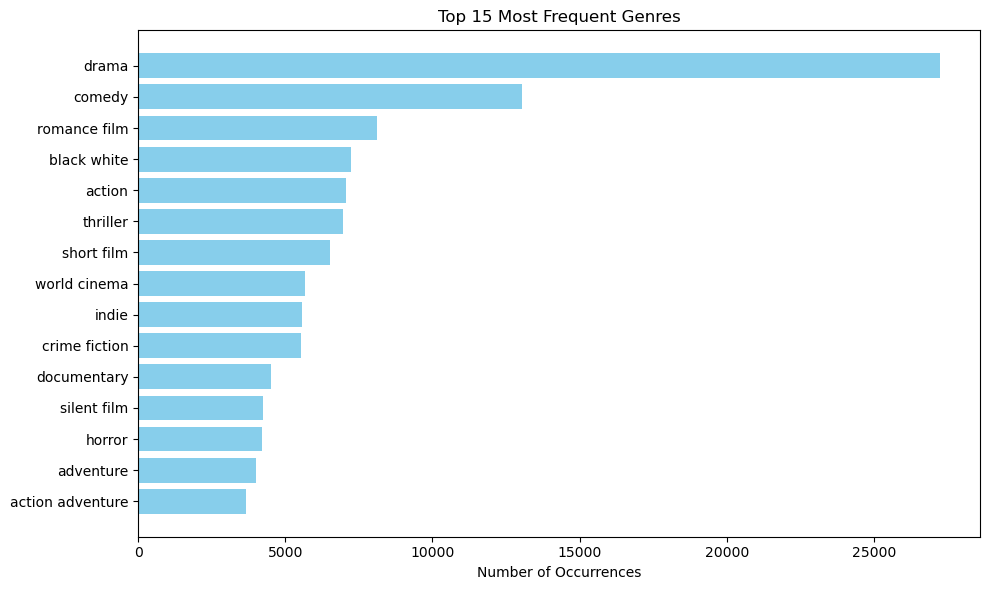

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter

# Load your dataset
df = pd.read_csv('train_summary_and_genres.csv')
df['genres'] = df['genres'].apply(literal_eval)

# Flatten the genre list
all_genres = [genre.strip() for sublist in df['genres'] for genre in sublist]

# Count genre occurrences
genre_counts = Counter(all_genres)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=True).tail(15)  # Top 15

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.xlabel('Number of Occurrences')
plt.title('Top 15 Most Frequent Genres')
plt.tight_layout()
plt.show()


# Part#4 Filmception GUI App

# 🎬 Movie Summary Tool

## 🎯 Objective
This Python tool processes movie summaries, predicting genres and converting summaries to audio in different languages. It uses a pre-trained genre classifier model for genre prediction and the M2M100 model for multilingual translation. The tool provides a user-friendly graphical interface built with Tkinter.

---

## 📦 Dependencies
- **PyTorch**: For the genre classification model and tensor operations.
- **Transformers**: To load pre-trained language models for translation and genre prediction.
- **gTTS (Google Text-to-Speech)**: For generating audio from text.
- **Tkinter**: For building the graphical user interface.
- **Pillow (PIL)**: For image handling in the Tkinter GUI.
- **Joblib**: For loading pre-saved machine learning models (Genre Classifier and label binarizer).

---

## 📝 Key Features
1. **Text-to-Speech Conversion**:
   - Converts the movie summary to audio in the selected language (e.g., English, French, Urdu, etc.).
   - Automatically translates the summary to the selected language using the `facebook/m2m100_418M` translation model.

2. **Genre Prediction**:
   - Predicts the genre(s) of a given movie summary using a pre-trained genre classification model.
   - Uses multi-label binarization to handle multiple genres.

3. **Graphical User Interface (GUI)**:
   - Built using **Tkinter** for a simple and interactive experience.
   - Allows users to input a movie summary, select a language, and view predicted genres.
   - Buttons for **Predict Genre** and **Convert to Audio**.

4. **Audio Playback**:
   - Audio is played directly through the system's default media player based on the operating system (Windows, macOS, or Linux).

---

## ⚙️ Example Workflow
1. **Input**: The user enters a movie summary in the text box.
2. **Prediction**: Upon clicking **Predict Genre**, the tool predicts and displays the genre(s) of the movie.
3. **Text-to-Speech**: The user can select a language and click **Convert to Audio** to listen to the summary in the chosen language.

---


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel, M2M100ForConditionalGeneration, M2M100Tokenizer
from gtts import gTTS
import os
import pickle
import joblib
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import tempfile
import tkinter as tk
from tkinter import messagebox, ttk
from tkinter.scrolledtext import ScrolledText
from PIL import Image, ImageTk

# Load device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Optional: Set Hugging Face token
os.environ['HF_TOKEN'] = 'Your Token Here'

# Load model once
m2m_model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")
# GenreClassifier
class GenreClassifier(nn.Module):
    def __init__(self, num_labels):
        super(GenreClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        return self.classifier(pooled_output)

# Load model and binarizer
model = GenreClassifier(num_labels=641)
model.load_state_dict(torch.load('best_model.pt', map_location=device))
model.to(device)
model.eval()

with open("label_binarizer.pkl", "rb") as f:
    mlb = joblib.load(f)

# Tokenizers
tokenizer = AutoTokenizer.from_pretrained('./tokenizer')
m2m_model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

# Language map
lang_map = {
    "English": "en",
    "French": "fr",
    "Spanish": "es",
    "Urdu": "ur",
    "Arabic": "ar",
    "Korean": "ko"
}

# Audio generation


def text_to_speech(summary, lang_code):
    try:
        # Translate only if the target language is not English
        if lang_code != "en":
            # Properly load model and tokenizer to device
            m2m_tokenizer.src_lang = "en"
            
            # Process the text in chunks if it's too long
            max_chunk_length = 500
            chunks = [summary[i:i+max_chunk_length] for i in range(0, len(summary), max_chunk_length)]
            translated_chunks = []
            
            for chunk in chunks:
                # Create tensor and move to device
                encoded = m2m_tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
                encoded = {k: v.to(device) for k, v in encoded.items()}
                
                # Generate translation with proper forced BOS token
                generated_tokens = m2m_model.generate(
                    **encoded, 
                    forced_bos_token_id=m2m_tokenizer.get_lang_id(lang_code),
                    max_length=512
                )
                
                # Decode the translation
                translated_chunk = m2m_tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
                translated_chunks.append(translated_chunk)
            
            # Join all translated chunks
            translated_text = " ".join(translated_chunks)
        else:
            translated_text = summary

        # Save translated text for debugging/verification
        with open("translated_summary.txt", "w", encoding="utf-8") as f:
            f.write(translated_text)

        # Generate TTS audio file
        tts = gTTS(text=translated_text, lang=lang_code)
        audio_file = "summary_audio.mp3"
        tts.save(audio_file)

        # Play audio file based on OS
        if os.name == 'nt':  # Windows
            os.system(f'start {audio_file}')
        elif os.name == 'posix':  # macOS/Linux
            if os.uname().sysname == 'Darwin':  # macOS
                os.system(f'afplay "{audio_file}"')
            else:  # Linux
                os.system(f'mpg123 "{audio_file}"')

        messagebox.showinfo("Success", f"Audio generated successfully in {lang_combo.get()}")

    except Exception as e:
        messagebox.showerror("Error", f"Text-to-speech error: {str(e)}")
        print(f"Detailed error: {e}")  # Print detailed error for debugging
# Genre prediction

def predict_genre(summary):
    inputs = tokenizer(summary, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.sigmoid(outputs).cpu().numpy()
        preds = (probs > 0.5).astype(int)

    predicted_labels = mlb.inverse_transform(preds)[0]
    return predicted_labels if predicted_labels else ["Unknown"]

# GUI setup
root = tk.Tk()
root.title("🎬 Movie Summary Tool")
root.geometry("800x600")
root.configure(bg="#1e1e2f")

style = ttk.Style()
style.theme_use("clam")
style.configure("TButton", font=("Segoe UI", 12), padding=10, background="#3a3a5c", foreground="white")
style.configure("TLabel", font=("Segoe UI", 12), background="#1e1e2f", foreground="white")
style.configure("TCombobox", font=("Segoe UI", 12))

header = ttk.Label(root, text="🎬 Movie Summary Tool", font=("Segoe UI", 20, "bold"), anchor="center")
header.pack(pady=20)

summary_label = ttk.Label(root, text="Enter movie summary:")
summary_label.pack()

summary_input = ScrolledText(root, height=10, wrap=tk.WORD, font=("Segoe UI", 12))
summary_input.pack(padx=20, pady=10, fill="both", expand=True)

lang_label = ttk.Label(root, text="Select language for audio:")
lang_label.pack(pady=(20, 5))

lang_combo = ttk.Combobox(root, values=list(lang_map.keys()), state="readonly")
lang_combo.set("English")
lang_combo.pack()

# Output
output_label = ttk.Label(root, text="Predicted Genres:")
output_label.pack(pady=(30, 5))

output_text = ttk.Label(root, text="", font=("Segoe UI", 12, "italic"), wraplength=700)
output_text.pack()

# Button functions

def handle_speech():
    summary = summary_input.get("1.0", tk.END).strip()
    if not summary:
        messagebox.showwarning("Input Required", "Please enter a movie summary.")
        return
    lang = lang_map[lang_combo.get()]
    text_to_speech(summary, lang)

def handle_predict():
    summary = summary_input.get("1.0", tk.END).strip()
    if not summary:
        messagebox.showwarning("Input Required", "Please enter a movie summary.")
        return
    genres = predict_genre(summary)
    output_text.config(text=", ".join(genres))

# Buttons
button_frame = tk.Frame(root, bg="#1e1e2f")
button_frame.pack(pady=20)

predict_button = ttk.Button(button_frame, text="🎭 Predict Genre", command=handle_predict)
predict_button.grid(row=0, column=0, padx=20)

speak_button = ttk.Button(button_frame, text="🔊 Convert to Audio", command=handle_speech)
speak_button.grid(row=0, column=1, padx=20)

root.mainloop()


e:\anaconda\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultiLabelBinarizer from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
